# Disease Status Prediction Based on patients informations and lab test data

# Import neccesary Packages

In [1]:
import pandas as Pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import sklearn as sk
# allow plots to appear within the notebook
%matplotlib inline

# Reading dataset using pandas

In [2]:
# read CSV file from the files in the same folder
admin_site1 = Pd.read_csv("administrative_site1.csv")
admin_site2 = Pd.read_csv("administrative_site2.csv")
lab = Pd.read_csv("lab.csv")

Checking out each adatbase features

In [3]:
admin_site1.columns

Index(['ID', 'admission_date', 'admission_time', 'discharge_date',
       'discharge_time', 'hospital_ID', 'gender', 'age', 'disease_status'],
      dtype='object')

In [4]:
admin_site2.columns

Index(['subjectid', 'admission.date', 'admission.time', 'discharge.date',
       'discharge.time', 'hospital', 'gender', 'age', 'disease.status'],
      dtype='object')

# Craete one dataframe combining all data

As you see although the order of columns are the same, the exact names are diffrent and we need to take care of that

In [5]:
admin = Pd.concat([admin_site1,admin_site2.rename(columns=dict(zip(admin_site2.columns,admin_site1.columns)))], ignore_index=True)

In [6]:
admin.columns

Index(['ID', 'admission_date', 'admission_time', 'discharge_date',
       'discharge_time', 'hospital_ID', 'gender', 'age', 'disease_status'],
      dtype='object')

In [7]:
admin.head(5)

,ID,admission_date,admission_time,discharge_date,discharge_time,hospital_ID,gender,age,disease_status
0,1003,2002-04-25,07:47,05/08/2002,12:02,St. Joseph's Health Centre,F,NaN,0
1,1008,2004-09-02,07:49,02/01/2005,10:07,St. Michael's Hospital,M,58.0,0
2,1009,2011-01-01,17:08,06/26/2011,08:16,St. Michael's Hospital,NaN,NaN,1
3,1019,2000-03-09,10:15,05/29/2000,22:38,St. Michael's Hospital,M,NaN,1
4,1030,2003-11-18,08:31,01/28/2004,13:21,St. Michael's Hospital,F,72.0,0


# Compare length of stay for each hospital

Create a new length_of_stay variable as defined as discharge date minus admission date

In [8]:
admin["discharge_date"] = Pd.to_datetime(admin["discharge_date"])
admin["admission_date"] = Pd.to_datetime(admin["admission_date"])

In [9]:
admin["length_of_stay"] = (admin["discharge_date"]-admin["admission_date"]).dt.days

In [10]:
admin.head(5)

,ID,admission_date,admission_time,discharge_date,discharge_time,hospital_ID,gender,age,disease_status,length_of_stay
0,1003,2002-04-25,07:47,2002-05-08,12:02,St. Joseph's Health Centre,F,NaN,0,13
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152
2,1009,2011-01-01,17:08,2011-06-26,08:16,St. Michael's Hospital,NaN,NaN,1,176
3,1019,2000-03-09,10:15,2000-05-29,22:38,St. Michael's Hospital,M,NaN,1,81
4,1030,2003-11-18,08:31,2004-01-28,13:21,St. Michael's Hospital,F,72.0,0,71


Calculate the mean length_of_stay for each hospital.

In [11]:
len_stay=admin.groupby(["hospital_ID"]).mean()["length_of_stay"]
len_stay

hospital_ID
Mount Sinai Hospital                  99.927273
St. Joseph's Health Centre            93.117391
St. Michael's Hospital               102.226212
Sunnybrook Health Sciences Centre     97.604288
Toronto Western Hospital             100.878378
Name: length_of_stay, dtype: float64

In [12]:
len_stay.tolist()

[99.92727272727272,
 93.11739130434782,
 102.2262118491921,
 97.60428849902534,
 100.87837837837837]

In [13]:
len_stay.index.tolist()

['Mount Sinai Hospital',
 "St. Joseph's Health Centre",
 "St. Michael's Hospital",
 'Sunnybrook Health Sciences Centre',
 'Toronto Western Hospital']

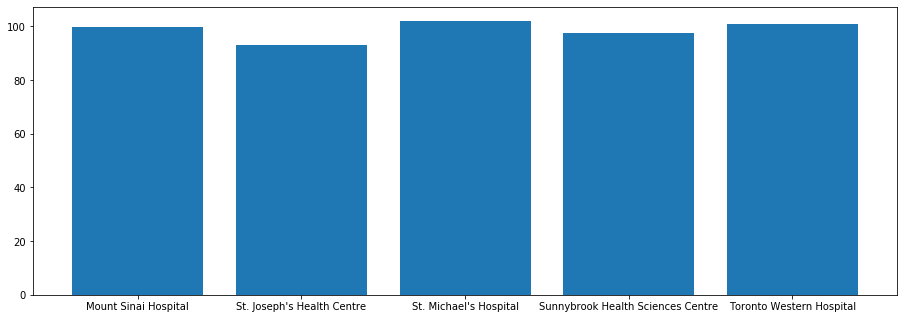

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
hospitals = len_stay.index.tolist()
length_of_stay = len_stay.tolist()
ax.bar(hospitals,length_of_stay)
plt.show()

# Join admin dataset with lab datset to have acces to the information of lab tests og each patients

checking out lab dataset features

In [109]:
lab.columns

Index(['ID', 'test_name', 'test_code', 'result_unit', 'result_value',
       'result_date', 'result_time', 'provider_name'],
      dtype='object')

In [110]:
all_lab = admin.join(lab.set_index("ID"), how="inner", on='ID')

In [111]:
all_lab.head(5)

,ID,admission_date,admission_time,discharge_date,discharge_time,hospital_ID,gender,age,disease_status,length_of_stay,test_name,test_code,result_unit,result_value,result_date,result_time,provider_name
0,1003,2002-04-25,07:47,2002-05-08,12:02,St. Joseph's Health Centre,F,NaN,0,13,Sodium plasma,NAPL,mmol/L,137.0,2002-05-07,05:26,"Wray, Jamie"
0,1003,2002-04-25,07:47,2002-05-08,12:02,St. Joseph's Health Centre,F,NaN,0,13,Creatinine plasma,CREAPL,umol/L,537.0,2002-05-02,02:02,"Young, Jennifer"
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152,Sodium plasma,NAPL,mmol/L,143.1,2004-10-19,04:17,"Wilbur, Kurra"
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152,Urea plasma,UREAPL,mmol/L,13.0,2004-11-05,13:58,"PREMOVICH, TAYLOR"
2,1009,2011-01-01,17:08,2011-06-26,08:16,St. Michael's Hospital,NaN,NaN,1,176,Sodium plasma,NAPL,mmol/L,145.7,2011-04-25,21:51,"Ivojevic, Alexandra"


If a test appears more than once for a subject (i.e., duplicated test_name for the same ID), filter
for the lowest result_value

In [112]:
all_lab_cleaned = all_lab.sort_values('result_value', ascending=True).drop_duplicates(["ID",'test_name']).sort_index()
all_lab_cleaned.head()

,ID,admission_date,admission_time,discharge_date,discharge_time,hospital_ID,gender,age,disease_status,length_of_stay,test_name,test_code,result_unit,result_value,result_date,result_time,provider_name
0,1003,2002-04-25,07:47,2002-05-08,12:02,St. Joseph's Health Centre,F,NaN,0,13,Creatinine plasma,CREAPL,umol/L,537.0,2002-05-02,02:02,"Young, Jennifer"
0,1003,2002-04-25,07:47,2002-05-08,12:02,St. Joseph's Health Centre,F,NaN,0,13,Sodium plasma,NAPL,mmol/L,137.0,2002-05-07,05:26,"Wray, Jamie"
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152,Urea plasma,UREAPL,mmol/L,13.0,2004-11-05,13:58,"PREMOVICH, TAYLOR"
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152,Sodium plasma,NAPL,mmol/L,143.1,2004-10-19,04:17,"Wilbur, Kurra"
2,1009,2011-01-01,17:08,2011-06-26,08:16,St. Michael's Hospital,NaN,NaN,1,176,Sodium plasma,NAPL,mmol/L,145.7,2011-04-25,21:51,"Ivojevic, Alexandra"


# Transform the lab data from long format to wide format 

In [113]:
all_lab_wide=all_lab_cleaned.pivot(index='ID', columns='test_name', values='result_value')
all_lab_wide.head()

test_name,Bicarbonate plasma,Chloride plasma,Creatinine plasma,Potassium plasma,Sodium plasma,Urea plasma
ID,,,,,,
1003,NaN,NaN,537.0,NaN,137.0,NaN
1005,NaN,NaN,NaN,NaN,NaN,37.3
1008,NaN,NaN,NaN,NaN,143.1,13.0
1009,NaN,NaN,73.1,NaN,145.7,NaN
1019,NaN,77.3,367.9,NaN,NaN,NaN


Now we can have the mena of each test 

In [115]:
all_lab_wide['Urea plasma'].mean()

72.66967592592593

# Impute data in case of any missing values 

Make a copy of the lab data and name it lab_impute

In [20]:
lab_impute = all_lab.copy()

In [21]:
lab_impute.head(5)

,ID,admission_date,admission_time,discharge_date,discharge_time,hospital_ID,gender,age,disease_status,length_of_stay,test_name,test_code,result_unit,result_value,result_date,result_time,provider_name
0,1003,2002-04-25,07:47,2002-05-08,12:02,St. Joseph's Health Centre,F,NaN,0,13,Sodium plasma,NAPL,mmol/L,137.0,2002-05-07,05:26,"Wray, Jamie"
0,1003,2002-04-25,07:47,2002-05-08,12:02,St. Joseph's Health Centre,F,NaN,0,13,Creatinine plasma,CREAPL,umol/L,537.0,2002-05-02,02:02,"Young, Jennifer"
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152,Sodium plasma,NAPL,mmol/L,143.1,2004-10-19,04:17,"Wilbur, Kurra"
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152,Urea plasma,UREAPL,mmol/L,13.0,2004-11-05,13:58,"PREMOVICH, TAYLOR"
2,1009,2011-01-01,17:08,2011-06-26,08:16,St. Michael's Hospital,NaN,NaN,1,176,Sodium plasma,NAPL,mmol/L,145.7,2011-04-25,21:51,"Ivojevic, Alexandra"


In [116]:
#make a new variable result_year from result_date
lab_impute["result_year"] = Pd.to_datetime(lab_impute["result_date"]).dt.year

In [23]:
lab_impute.head(5)

,ID,admission_date,admission_time,discharge_date,discharge_time,hospital_ID,gender,age,disease_status,length_of_stay,test_name,test_code,result_unit,result_value,result_date,result_time,provider_name,result_year
0,1003,2002-04-25,07:47,2002-05-08,12:02,St. Joseph's Health Centre,F,NaN,0,13,Sodium plasma,NAPL,mmol/L,137.0,2002-05-07,05:26,"Wray, Jamie",2002
0,1003,2002-04-25,07:47,2002-05-08,12:02,St. Joseph's Health Centre,F,NaN,0,13,Creatinine plasma,CREAPL,umol/L,537.0,2002-05-02,02:02,"Young, Jennifer",2002
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152,Sodium plasma,NAPL,mmol/L,143.1,2004-10-19,04:17,"Wilbur, Kurra",2004
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152,Urea plasma,UREAPL,mmol/L,13.0,2004-11-05,13:58,"PREMOVICH, TAYLOR",2004
2,1009,2011-01-01,17:08,2011-06-26,08:16,St. Michael's Hospital,NaN,NaN,1,176,Sodium plasma,NAPL,mmol/L,145.7,2011-04-25,21:51,"Ivojevic, Alexandra",2011


replace all result_value collected in the year 2002 with NA

In [24]:
lab_impute.loc[lab_impute['result_year'] == 2002, 'result_value'] = np.nan

In [25]:
lab_impute.head(5)

,ID,admission_date,admission_time,discharge_date,discharge_time,hospital_ID,gender,age,disease_status,length_of_stay,test_name,test_code,result_unit,result_value,result_date,result_time,provider_name,result_year
0,1003,2002-04-25,07:47,2002-05-08,12:02,St. Joseph's Health Centre,F,NaN,0,13,Sodium plasma,NAPL,mmol/L,NaN,2002-05-07,05:26,"Wray, Jamie",2002
0,1003,2002-04-25,07:47,2002-05-08,12:02,St. Joseph's Health Centre,F,NaN,0,13,Creatinine plasma,CREAPL,umol/L,NaN,2002-05-02,02:02,"Young, Jennifer",2002
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152,Sodium plasma,NAPL,mmol/L,143.1,2004-10-19,04:17,"Wilbur, Kurra",2004
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152,Urea plasma,UREAPL,mmol/L,13.0,2004-11-05,13:58,"PREMOVICH, TAYLOR",2004
2,1009,2011-01-01,17:08,2011-06-26,08:16,St. Michael's Hospital,NaN,NaN,1,176,Sodium plasma,NAPL,mmol/L,145.7,2011-04-25,21:51,"Ivojevic, Alexandra",2011


impute these NAs with the mean value of the remaining records of the
corresponding test_name (e.g., replace the NAs of the test_name “Bicarbonate plasma” with its mean
value of non-NAs). To this end, we need to calculate the means of each test first.

In [26]:
result_values_mean=lab_impute.groupby(["test_name"]).mean()["result_value"]
result_values_mean

test_name
Bicarbonate plasma     56.530405
Chloride plasma       130.503859
Creatinine plasma     323.499742
Potassium plasma        6.322656
Sodium plasma         134.846264
Urea plasma            75.044647
Name: result_value, dtype: float64

In [27]:
test_means = result_values_mean.tolist()
test_means

[56.530405405405396,
 130.5038585209004,
 323.4997422680414,
 6.322656249999999,
 134.84626407369507,
 75.04464692482912]

In [28]:
test_types = result_values_mean.index.tolist()
test_types

['Bicarbonate plasma',
 'Chloride plasma',
 'Creatinine plasma',
 'Potassium plasma',
 'Sodium plasma',
 'Urea plasma']

In [29]:
for i in range(len(test_types)):
               lab_impute.loc[(lab_impute["test_name"]==test_types[i]) & (lab_impute.result_value.isnull()), "result_value"] = test_means[i]

In [30]:
lab_impute.head(5)

,ID,admission_date,admission_time,discharge_date,discharge_time,hospital_ID,gender,age,disease_status,length_of_stay,test_name,test_code,result_unit,result_value,result_date,result_time,provider_name,result_year
0,1003,2002-04-25,07:47,2002-05-08,12:02,St. Joseph's Health Centre,F,NaN,0,13,Sodium plasma,NAPL,mmol/L,134.846264,2002-05-07,05:26,"Wray, Jamie",2002
0,1003,2002-04-25,07:47,2002-05-08,12:02,St. Joseph's Health Centre,F,NaN,0,13,Creatinine plasma,CREAPL,umol/L,323.499742,2002-05-02,02:02,"Young, Jennifer",2002
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152,Sodium plasma,NAPL,mmol/L,143.100000,2004-10-19,04:17,"Wilbur, Kurra",2004
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152,Urea plasma,UREAPL,mmol/L,13.000000,2004-11-05,13:58,"PREMOVICH, TAYLOR",2004
2,1009,2011-01-01,17:08,2011-06-26,08:16,St. Michael's Hospital,NaN,NaN,1,176,Sodium plasma,NAPL,mmol/L,145.700000,2011-04-25,21:51,"Ivojevic, Alexandra",2011


In [31]:
result_values_updated_mean=lab_impute.groupby(["test_name"]).mean()["result_value"]
result_values_updated_mean

test_name
Bicarbonate plasma     56.530405
Chloride plasma       130.503859
Creatinine plasma     323.499742
Potassium plasma        6.322656
Sodium plasma         134.846264
Urea plasma            75.044647
Name: result_value, dtype: float64

# Find spesific names in providers names

For the lab data, find rows where the provider_name contains “Jessica” or “Kelsey”. 

In [32]:
lab.head(5)

,ID,test_name,test_code,result_unit,result_value,result_date,result_time,provider_name
0,1003,Sodium plasma,NAPL,mmol/L,137.0,2002-05-07,05:26,"Wray, Jamie"
1,1003,Creatinine plasma,CREAPL,umol/L,537.0,2002-05-02,02:02,"Young, Jennifer"
2,1005,Urea plasma,UREAPL,mmol/L,37.3,2005-12-04,16:02,"Glass, Caitlin"
3,1008,Sodium plasma,NAPL,mmol/L,143.1,2004-10-19,04:17,"Wilbur, Kurra"
4,1008,Urea plasma,UREAPL,mmol/L,13.0,2004-11-05,13:58,"PREMOVICH, TAYLOR"


In [33]:
lab_identified = lab[lab["provider_name"].str.contains('Jessica|Kelsey', flags=re.I, regex=True)]

In [34]:
lab_identified.head(5)

,ID,test_name,test_code,result_unit,result_value,result_date,result_time,provider_name
27,1071,Sodium plasma,NAPL,mmol/L,141.5,2009-07-10,12:31,"Wright, Kelsey"
42,1127,Bicarbonate plasma,TCO2PL,mmol/L,60.4,2001-11-14,01:46,"Welch, Jessica"
46,1143,Sodium plasma,NAPL,mmol/L,121.2,2006-05-01,08:27,"Griffen, Jessica"
177,1620,Sodium plasma,NAPL,mmol/L,129.4,2004-09-15,01:49,"Macoy, Kelsey"
301,2059,Creatinine plasma,CREAPL,umol/L,231.4,2002-08-07,17:45,"Costello, Jessica"


In [35]:
lab_identified.groupby(["test_code"]).mean()["result_value"]

test_code
CLPL      124.740000
CREAPL    324.425000
KPL         4.855556
NAPL      133.074194
TCO2PL     55.209091
UREAPL     91.127273
Name: result_value, dtype: float64

# Create a function to compute the mean test result_value from  test_code and hospital_ID

In [36]:
def compute_hospital_mean(test_code_identified, hospital_ID_identified):
    df_new = all_lab.loc[(all_lab["test_code"]==test_code_identified)&(all_lab["hospital_ID"]==hospital_ID_identified)]
    return df_new.mean()["result_value"]

Check the result for test_code = KPL and hospital_ID = St. Michael’s Hospital

In [37]:
compute_hospital_mean("KPL", "St. Michael's Hospital")

6.373599999999998

# run a regression model and try to see if we camn predict disease_status from all feature

In [38]:
admin.columns

Index(['ID', 'admission_date', 'admission_time', 'discharge_date',
       'discharge_time', 'hospital_ID', 'gender', 'age', 'disease_status',
       'length_of_stay'],
      dtype='object')

In [39]:
admin.isna().sum()

ID                  0
admission_date      0
admission_time      0
discharge_date      0
discharge_time      0
hospital_ID         0
gender            300
age               400
disease_status      0
length_of_stay      0
dtype: int64

In [40]:
admin_cleaned = admin.dropna()

In [41]:
admin_cleaned.isna().sum()

ID                0
admission_date    0
admission_time    0
discharge_date    0
discharge_time    0
hospital_ID       0
gender            0
age               0
disease_status    0
length_of_stay    0
dtype: int64

In [42]:
admin_cleaned.head()

,ID,admission_date,admission_time,discharge_date,discharge_time,hospital_ID,gender,age,disease_status,length_of_stay
1,1008,2004-09-02,07:49,2005-02-01,10:07,St. Michael's Hospital,M,58.0,0,152
4,1030,2003-11-18,08:31,2004-01-28,13:21,St. Michael's Hospital,F,72.0,0,71
5,1031,2008-09-11,12:09,2009-01-11,01:47,St. Michael's Hospital,F,54.0,1,122
6,1036,2000-08-20,19:05,2000-12-31,07:24,St. Michael's Hospital,F,42.0,1,133
7,1037,2013-10-15,05:11,2013-11-07,13:54,St. Michael's Hospital,F,48.0,1,23


In [90]:
# create a Python list of feature names
feature_cols = ['age', 'gender','hospital_ID']

# use the list to select a subset of the original DataFrame
X = admin_cleaned[feature_cols]

# print the first 5 rows
X.head(5)

,age,gender,hospital_ID
1,58.0,M,St. Michael's Hospital
4,72.0,F,St. Michael's Hospital
5,54.0,F,St. Michael's Hospital
6,42.0,F,St. Michael's Hospital
7,48.0,F,St. Michael's Hospital


In [91]:
# select a Series from the DataFrame
y = admin_cleaned['disease_status']

# print the first 5 values
y.head(5)

1    0
4    0
5    1
6    1
7    1
Name: disease_status, dtype: int64

In [92]:
# dummy encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [93]:
ohe.fit_transform(admin_cleaned[['gender','hospital_ID']])

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [94]:
ohe.categories_

[array(['F', 'M'], dtype=object),
 array(['Mount Sinai Hospital', "St. Joseph's Health Centre",
        "St. Michael's Hospital", 'Sunnybrook Health Sciences Centre',
        'Toronto Western Hospital'], dtype=object)]

In [95]:
# use when different features need different preprocessing
from sklearn.compose import make_column_transformer

In [96]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['gender','hospital_ID']),
    remainder='passthrough')

In [97]:
column_trans.fit_transform(X)

array([[ 0.,  1.,  0., ...,  0.,  0., 58.],
       [ 1.,  0.,  0., ...,  0.,  0., 72.],
       [ 1.,  0.,  0., ...,  0.,  0., 54.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., 46.],
       [ 0.,  1.,  0., ...,  1.,  0., 84.],
       [ 0.,  1.,  0., ...,  1.,  0., 58.]])

In [98]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [99]:
# chain sequential steps together
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(column_trans, logreg)

In [100]:
from sklearn.model_selection import cross_val_score
# cross-validate the entire process
# thus, preprocessing occurs within each fold of cross-validation
scores = cross_val_score(pipe, X, y, cv=10, scoring='accuracy')

# performance in each fold
print("Accuracies in each fold: \n" , scores)
# average performance across all folds
print("Average Accuracy across the folds: %0.2f" % (scores.mean()))

Accuracies in each fold: 
 [0.47101449 0.47445255 0.46715328 0.5620438  0.60583942 0.54744526
 0.51094891 0.51824818 0.51094891 0.52554745]
Average Accuracy across the folds: 0.52


# Splitting X and y into training and testing sets

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [102]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(959, 3)
(959,)
(412, 3)
(412,)


In [103]:
from sklearn.linear_model import LogisticRegression 

# Create logistic regression object
logreg = LogisticRegression()

# Train the model using the training sets
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['gender', 'hospital_ID'])],
                                   verbose=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                   

In [104]:
# Make predictions using the testing set
y_pred = pipe.predict(X_test)

In [105]:
from sklearn import metrics

print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_test, y_pred))

accuracy of the predictions: 0.4854368932038835
blanced accuracy of the predictions: 0.48688335258208215


In [106]:
# Make predictions using the testing set
y_pred_train = pipe.predict(X_train)

In [107]:
print("accuracy of the predictions:", metrics.accuracy_score(y_train, y_pred_train))
print("blanced accuracy of the predictions:", metrics.balanced_accuracy_score(y_train, y_pred_train))

accuracy of the predictions: 0.5620437956204379
blanced accuracy of the predictions: 0.559831069313828
